In [8]:
import numpy as np
import matplotlib.pyplot as plt
packpath=r'E:\jupyter-notebook\packages'
import sys
sys.path.append(packpath)# modify
import waveform
filename="G:/CDEX/DATA/20200331_t7_Th_BEGe_2026_6us_0.5_5_2111_0.5_10_Difout10_FADC_RAW_Data_%d.bin"

4.205


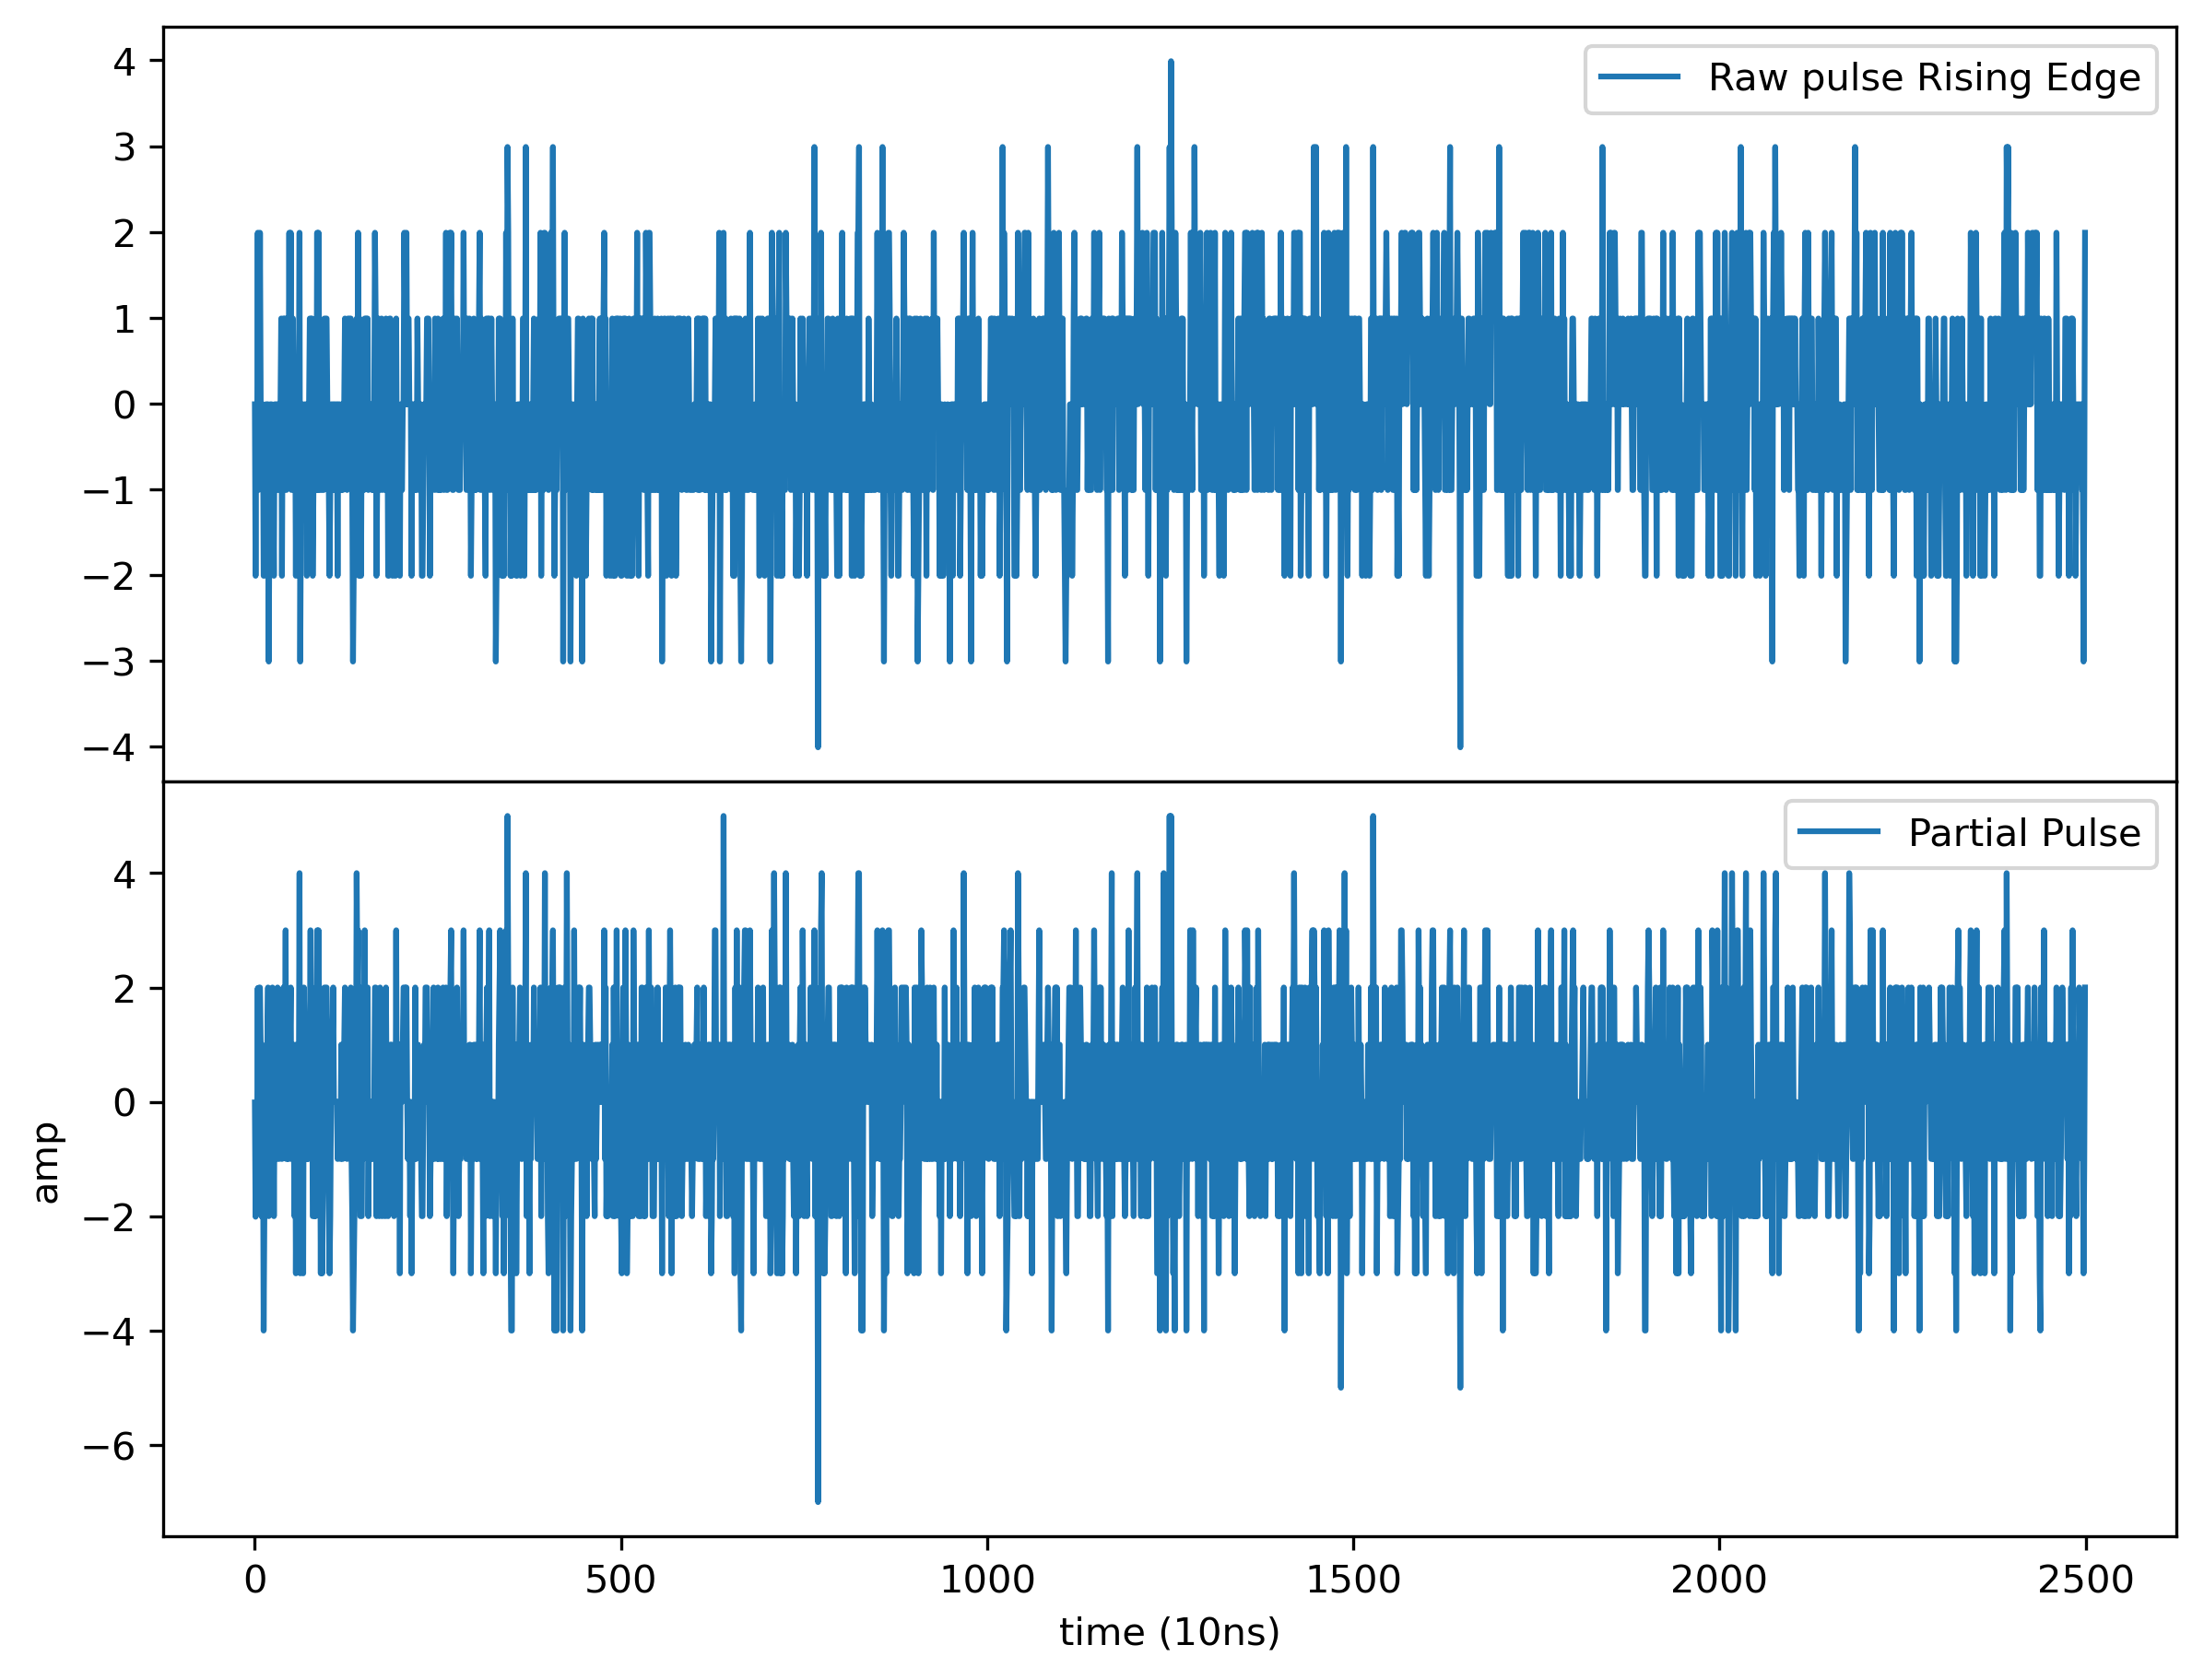

In [9]:

#####MWA
fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=300,sharex=True)
wave=waveform.waveform(filename,range(4),Taos=10,FT=2,L=14)
wave.read_event(filename%0,1024,channel=1)
wave.read_event(filename%0,1024,channel=2)

wave.cut_around_risep(0.5,2500,Invert=1)
print(wave.max_amp(Length=800))
ax[0].plot(wave.processedw,label='Raw pulse Rising Edge')
# wave.MWA(5)
# ax[0].plot(wave.processedw,label='Rising Edge MWA')
ax[0].legend()
wave.Partial(5)
ax[1].plot(wave.processedw,label='Partial Pulse')
ax[1].legend()
ax[1].set(xlabel='time (10ns)',ylabel='amp')
plt.subplots_adjust(left=0.08, bottom=0.08, right=0.99, top=0.99,
                wspace=0, hspace=0)
plt.show()
#fig.savefig(r'E:\CDEX\0vbb\Figure\A\MWA.png')

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(8, 6),dpi=1200)#,sharex=True)
wave=waveform.waveform(filename,range(4),Taos=10,FT=2,L=14)
wave.read_event(filename%0,1)
wave.cut_around_risep(0.5,1024)
wave.interpolate(5,'cubic')
rawpulse=wave.processedw[:]
ax[0].plot(wave.processedw,label='Raw pulse Rising Edge')

wave.wavelet_denoise('bior6.8',6)
ax[0].plot(wave.processedw,label='Rising Edge (Wavelet denoised)')
ax[0].legend()

ax[1].plot(rawpulse-wave.processedw,label='Raw - Processed pulse')
wave.Partial(25)
ax[2].plot(wave.processedw[2200:2900],label='Partial Pulse')
ax[2].legend()
ax[2].set(xlabel='time (2ns)',ylabel='amp')

plt.subplots_adjust(left=0.08, bottom=0.08, right=0.99, top=0.99,
                wspace=0, hspace=0.15)
plt.show()
fig.savefig(r'E:\CDEX\0vbb\Figure\A\Wavelet.png')

In [ ]:
wave=waveform.waveform(filename,range(4),Taos=10,FT=2,L=14)
wave.read_event(filename%0,1)
wave.cut_around_risep(0.5,4096)
wave.TrapShapping(2,402,404,-1e-4)
plt.plot(wave.processedw)
wave.MWA(300)
plt.plot(wave.processedw)

In [ ]:
wave.cut_around_risep(0.5,4096)
plt.plot(wave.ZACshapping(wave.processedw,wave.FF))

In [ ]:
A,E=wave.iterate(range(4))

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 6),dpi=1200)
spec,bins,patchs=ax.hist(E[:,0],bins=1500,range=[0,1000],density=True,histtype='step',log=True,\
                      linewidth=0.3)#,color=['black','blue'])